In [1]:
import time
from numba import jit
import numpy as np
import matplotlib.pyplot as plt

### Speed test between pure Python, Numpy, and Numba acceleration:
In this exercise we are going to test the speed of simple prime number counting functions written in pure Python, Numpy, and pure Python code accelerated using Numba. The user can supply the range over which the prime numbers will be searched, using two arguments `start` and `end`. A driver funtion will then be used to run these functions an arbitrary number of times. In each iteration the amount of time taken by the codes is computed, and the run times are then plotted as bar-graphs.

#### packages needed: `Numpy`, `Matplotlib`, and  `Numba`

In [2]:
def calculatePrimes(start, end):
    """This function finds out how many prime number exist between <start> and <end>
    INPUT:
    ------
    start = starting value (INT)
    end = Ending value (INT)
    
    RETURNS:
    --------
    total number of primes between <start> and <end> (INT)
    """
    primes = []
    for test_number in range(start, end+1):
        count = 0 # keeps track of how many times a number is exactly divisble by an integer
        for divisor in range(2, test_number):
            if test_number/divisor == int(test_number/divisor):
                count += 1
        if count == 0:
            primes.append(test_number)
    return len(primes)

Now, we will accelerate this above funtion using Numba. This is simply done by decorating the function using Numba's `jit` compiler. The rest of the function stays unchanged.

In [3]:
@jit(nopython=True)
def calculatePrimes_numba(start, end):
    """This function finds out how many prime number exist between <start> and <end>
    using Numba acceleration
    INPUT:
    ------
    start = starting value (INT)
    end = Ending value (INT)
    
    RETURNS:
    --------
    total number of primes between <start> and <end> (INT)
    """
    primes = []
    for test_number in range(start, end+1):
        count = 0 # keeps track of how many times a number is exactly divisble by an integer
        for divisor in range(2, test_number):
            if test_number/divisor == int(test_number/divisor):
                count += 1
        if count == 0:
            primes.append(test_number)
    return len(primes)

Finally, we will do the same operation using Numpy. This requies a completely different way of writing the code. We will be using Numpy meshgrid to construct a matrix in which all possible divisions of all the numbers from `start` to `end` are going to be computed. Then we will find how many of these divisions are whole numbers. If a number if prime, only two such divisions will be whole numbers, once when it is divided by `1` and then when it is divided by itself. Thus, if the number of case where the result of the division is a whole number if more than 2 it can't be a prime number.

In [4]:
def calculatePrimes_numpy(start, end):
    """This function finds out how many prime numbers exist between <start> and <end>
    using Numpy arrays.
    INPUT:
    ------
    start = starting value (INT)
    end = Ending value (INT)
    
    RETURNS:
    --------
    total number of primes between <start> and <end> (INT)
    """
    x = np.arange(start, end+1)
    y = np.arange(1, end)
    X, Y = np.meshgrid(x, y)
    Z = X/Y
    matrix = Z.astype(int) == Z
    return np.sum(np.sum(matrix, axis=0) <= 2)

Now we will write a wrapper function that will be run these above functions using their required arguments. This function will have the ability to run above functions any arbitrary number of times, and then it will generate a plot with the run-times. Additionally, it will also return the mean and median run-time for running each function.

In [5]:
def speedtest(func, N, *args, log=False, **kwargs):
    """This function accepts as argument a function, and its arguments, and runs it 
    an arbitrary number of times. It times the run in each iteration, and creates a
    plot of the run-time of every iteration. 
    
    INPUT:
    ------
    func: The function for which we intend to test the speed
    N: Number of iterations for which we want to test the speed
    log: Set the y-scale to logarithmic [False]
    
    RETURN:
    -------
    The mean value and the median value of the run-times (Tuple)
    """
    times = []
    for _ in range(N):
        start = time.time()
        x = func(*args, **kwargs)
        end = time.time()
        times.append(end - start)
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(12,6))
    plt.bar(1+np.arange(N), times)
    plt.ylabel("Run time (s)")
    plt.xlabel("Run #")
    if log:
        ax = plt.gca()
        ax.set_yscale("log")
    plt.show()
    return (np.mean(np.array(times)), np.median(np.array(times)))
    

We will now run all the three functions to compute the prime numbers from 1 to 5000. Each function will be run 200 times.

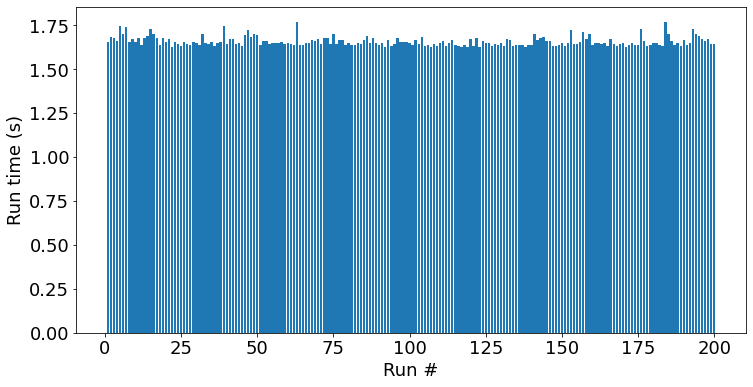

(1.6560320127010346, 1.6474940776824951)

In [6]:
speedtest(calculatePrimes, 200, 1, 5000)

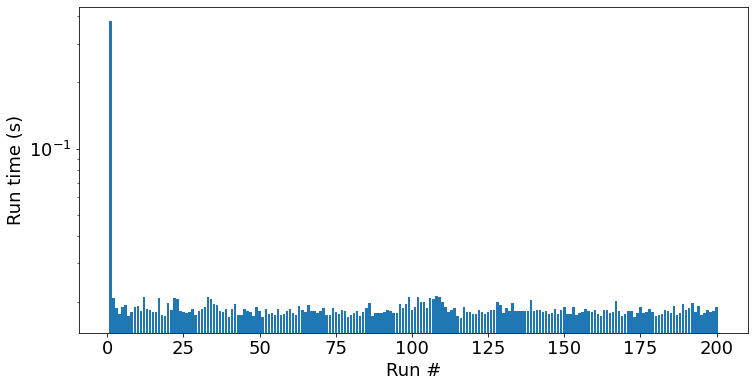

(0.020235674381256105, 0.01820063591003418)

In [7]:
speedtest(calculatePrimes_numba, 200, 1, 5000, log=True)

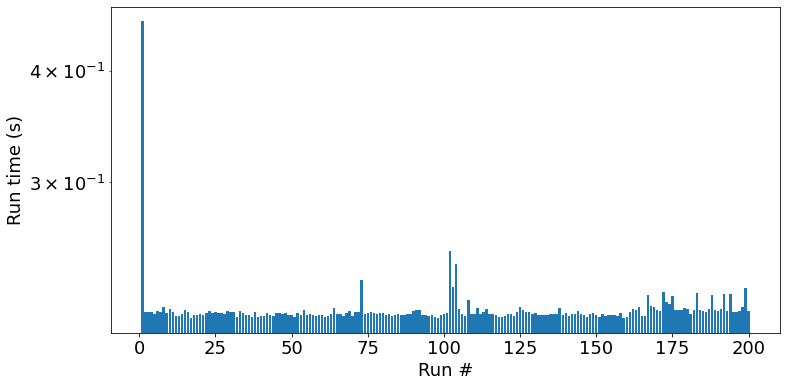

(0.21591884016990662, 0.21355652809143066)

In [8]:
speedtest(calculatePrimes_numpy, 200, 1, 5000, log=True)

### Results:
We find from the above exercise the mean time taken by the pure python implementation of the code is around 1.66 seonds. Where as application of Numpy reduces this time to 0.22 seconds. This is 7.5 times speedup. Incorporating Numba in the same pure python implementation of the code lowers the mean run time further down to around 0.02 second, i.e., 11 times faster than the Numpy implementation. However, we have to keep in mind that in this implementation the Numpy version is doing a lot of unnecessary computation over a square grid, where as the Numba implementation is looping over only up to the number for which prime number determination is being conducted (a lower-triangle grid). There might be scope for improving the Numpy function.

We also need to keep in mind that implemending Numba acceleration is significantly harder for anything that is not a simple for loop in which simple mathematical operation is being conducted. Nevertheless, the performance of Numba is really impressive in this test.